## Lineare Regression

In diesem Notebook werden wir eine lineare Regression selbst implementieren, und dabei Numpy nutzen. Im späteren Verlauf werden wir dann __sklearn__ verwenden. Das Beispiel soll darüber hinaus einige Grundbegriffe des maschinellen Lernens vermitteln.

In [1]:
# Standard-Imports zum Arbeiten mit Numpy
import math
import numpy as np
import matplotlib.pyplot as plt

Wir beginnen zunächst mit einem einfachen zufälligen Datensatz mit einem Feature X und Targets Y:

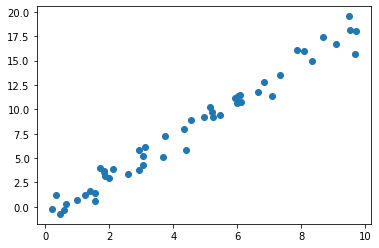

In [2]:
rng = np.random.RandomState(42) # fixierter Seed-Wert
x = 10 * rng.rand(50) 
y = 2*x -1 + rng.randn(50) 

# TODO plotten Sie die Daten als Scatterplot:

plt.scatter(x, y);

Ziel ist es, eine Regressionsgerade zu finden, also ein lineares Modell, welches den Zusammenhang zwischen x und y möglichst gut beschreibt. Unser Modell hat die folgende Form:

$$ \hat{y}  = \beta_0 + \beta_1 x $$

$\beta_0$ ist dabei ein konstanter Anteil (genannt __bias__), in unserem einfachen Fall der y-Achsenabschnitt, und $\beta_1$ ist die Steigung unserer Geraden.

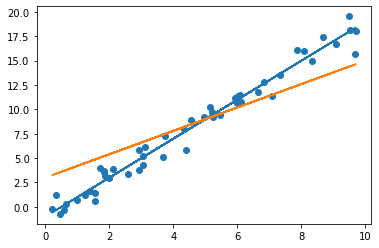

In [3]:
good_betas = np.array([-1, 2])
bad_betas = np.array([3, 1.2])

# TODO plotten Sie die beiden Geraden, die durch die gegebenen beta-Koeffizienten entstehen:
y_pred_good = good_betas[0] + good_betas[1] * x
y_pred_bad = bad_betas[0] + bad_betas[1] * x

plt.scatter(x, y);
plt.plot(x, y_pred_good)
plt.plot(x, y_pred_bad)

Wenn wir unsere x-Werte als Matrix organisieren, und als erste Spalte eine Spalte mit Einsen hinzufügen, können wir diese Berechnung als Matrixoperation ausdrücken (und später auf beliebig viele Features erweitern):

$$ \hat{y} = X\beta $$

In [4]:
X = np.c_[np.ones(len(x)), x] # np._c[...] ist eine Kurzschreibweise, 
                              # die es erlaubt, mehrere Spalten zu einer Matrix zusammenzufügen

# TODO zeigen Sie die ersten 5 Zeilen von X an
X[0:5, :] 

array([[1.        , 3.74540119],
       [1.        , 9.50714306],
       [1.        , 7.31993942],
       [1.        , 5.98658484],
       [1.        , 1.5601864 ]])

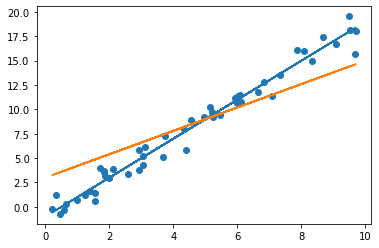

In [5]:
y_pred_good = X @ good_betas # oder X.dot(good_betas)
y_pred_bad = X @ bad_betas

plt.scatter(X[:, 1], y);
plt.plot(X[:, 1], y_pred_good)
plt.plot(X[:, 1], y_pred_bad)

Jetzt definieren wir eine Fehlerfunktion $J$ (_loss function_ oder _cost function_ ), die die quadratischen Fehler/Abweichungen der Datenpunkte von einer Geraden berechnet ($X$ - Features, $y$ - Targets, $\hat{y}$ - Vorhersagen des Models):

$$ J(\beta) = \frac{1}{2m} \sum_{j=1}^m{(y^j - \hat{y}^j)^2} $$

oder vektoriell geschrieben:

$$J(\beta) = \frac{1}{2m} (y - \hat{y})^T (y - \hat{y})$$



In [6]:
# TODO Implementieren Sie die Fehlerfunktion "cost" mit numpy:

def cost(y, y_pred):
    m = y.shape[0]
    return (1 / (2 * m)) * (y - y_pred).T @ (y - y_pred)

# Tests
# assert(math.isclose(cost(y, X @ good_betas), 0.41358136117306665))
# assert(math.isclose(cost(y, X @ bad_betas), 2.979345185814611))

Um die besten Parameter $\beta$ zu finden, wird jetzt die Fehlerfunktion nach $\beta$ abgeleitet. Im Falle der linearen Regression kann man sogar direkt eine Lösung angeben, im Allgemeinen wird man die Ableitung (den Gradienten) nutzen, um mit einem Gradientenabstieg ein (eventuell lokales) Minimum zu finden. Lösung (die Herleitung sprengt hier unseren Rahmen):

$$ \frac{\partial J}{\partial \beta} =  \frac{1}{m} ( X^T (\hat{y} - y)) $$

In [7]:
# TODO implementieren Sie die Funktion gradient mit numpy:
def gradient(y, y_pred, X):
    m = X.shape[0]
    gradient = (1 / m) * \
         X.T @ (y_pred - y)

    return gradient

# assert(np.allclose(gradient(y, y_pred_good, X), np.array([0.00294529, 0.19586796])))
# assert(np.allclose(gradient(y, y_pred_bad, X), np.array([ 0.43555405, -4.41778084])))

Um per Gradientenabstieg den Fehler zu minimieren, können wir mit zufälligen Parametern $\beta^0$ beginnen - dann berechnen wir den Gradienten der Fehlerfunktion für diese Parameter, und gehen dann im Parameterraum einen kleinen Schritt in Richtung des stärksten Abstiegs (der Gradient zeigt in Richtung der stärksten Steigung im Parameterraum) - die Update-Regel lautet:

$$ \beta \leftarrow \beta - \textit{lr} \frac{\partial J}{\partial \beta} (\beta)$$

($\textit{lr}$ ist dabei die _Lernrate_ - z.B. 0.01)

array([0.22062746, 1.79516982])

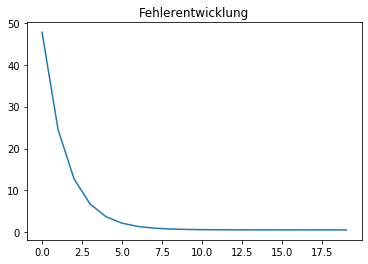

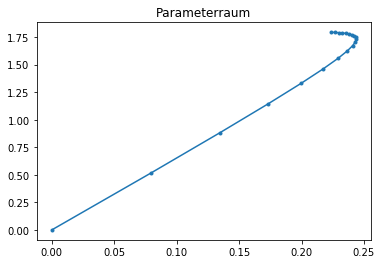

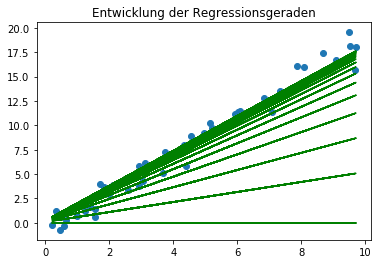

In [8]:
# Gradientenabstieg

# Start mit einem beliebigen Wert für beta
beta = np.array([0.0, 0.0])
steps = 20
lr = 0.01

costs = np.zeros(steps)
betas = np.zeros((steps, 2))

for i in range(steps):
    y_pred = X @ beta
    costs[i] = cost(y, y_pred)
    betas[i,:] = beta
    beta = beta - lr * gradient(y, y_pred, X)

                 
plt.plot(costs)
plt.title("Fehlerentwicklung")

plt.figure()
plt.title("Parameterraum")
plt.plot(betas[:,0], betas[:,1], '.-')

plt.figure()
plt.title("Entwicklung der Regressionsgeraden")
plt.scatter(x, y)

for i in range(steps):
    y_pred = X @ betas[i, :]
    plt.plot(x, y_pred, 'g')
beta

## Lineare Regression objektorientiert

Im folgenden soll der entwickelte Code noch in eine Klasse verpackt werden - kopieren Sie Ihre Methoden an die geeigneten Stellen:

In [9]:
class LinearRegressionGradientDescent:
    def __init__(self, learning_rate=0.01):
        self.learning_rate = learning_rate
        
    def cost(self, y, y_pred):
        m = y.shape[0]
        return (1 / (2 * m)) * (y - y_pred).T @ (y - y_pred)

    def gradient(self, y, y_pred, X):
        m = X.shape[0]
        gradient = (1 / m) * X.T @ (y_pred - y)

        return gradient

    def predict(self, X):
        return X @ self.beta
        
    def fit(self, X, y, steps=20):
        n_samples, n_features = X.shape
        self.beta = np.zeros(n_features)

        self.costs = np.zeros(steps)
        self.betas = np.zeros((steps, 2))

        for i in range(steps):
            y_pred = X @ self.beta
            self.costs[i] = cost(y, y_pred)
            self.betas[i,:] = self.beta
            self.beta = self.beta - self.learning_rate * gradient(y, y_pred, X)

Betas [0.22062746 1.79516982]


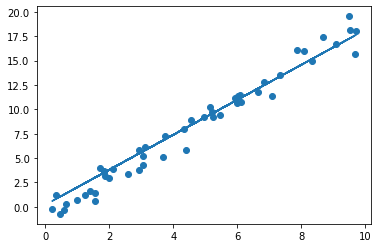

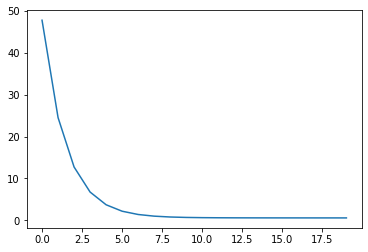

In [10]:
lin_model = LinearRegressionGradientDescent()
lin_model.fit(X, y)
y_pred = lin_model.predict(X)

plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], y_pred)

print("Betas", lin_model.beta)
plt.figure()
plt.plot(lin_model.costs)

In __sklearn__ ist dieses Verfahren (allerdings mit stochastischem Gradientenabstieg und Regularisierung) bereits implementiert, und die Schnittstelle ähnelt unserer Klasse:

Betas [-0.35078601  1.92975748]


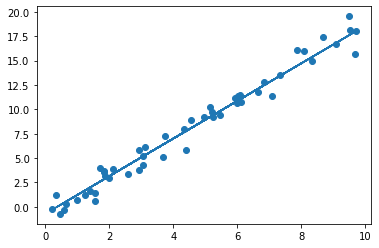

In [11]:
# eine ähnliche Berechnung mit sklearn
from sklearn.linear_model import SGDRegressor

lin_model = SGDRegressor(max_iter=100, eta0=lr)
lin_model.fit(X, y)
y_pred = lin_model.predict(X)

plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], y_pred)

print("Betas", lin_model.coef_)